In [1]:
#! /home/emo4002/colossus_shared3/miniconda3/bin/python3
import os
import zipfile
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import model_from_json
import nibabel as nib
from sklearn.model_selection import StratifiedKFold
from scipy import ndimage
import random
from sklearn.utils import class_weight
from keras import backend as K
from joblib import parallel_backend
from sklearn.model_selection import train_test_split
import json
import sys

In [105]:
print("Loading pkled data")

cwd = os.getcwd()
data_dir = str(cwd)+"/data"

pickle_in = open(data_dir + "/all_xdata.pkl", "r+b")
x = pickle.load(pickle_in)

pickle_in = open(data_dir + "/all_ydata.pkl", "r+b")
y = pickle.load(pickle_in)

results_dir=str(cwd) 

Loading pkled data


In [15]:
print(cwd)

/mnt/shared_data3/emo4002/MSpredict/3d-cnn/code


In [4]:
def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    #volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [157]:
print("MRI scans of individuals with disabled EDSS:  " + str(len(x)))
skf=StratifiedKFold(n_splits=10,random_state=7,shuffle=True)
# Define per-fold score containers
auc_per_fold = []
loss_per_fold = []

MRI scans of individuals with disabled EDSS:  295


In [130]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.21052631578947367
0.1864406779661017


In [158]:
def get_model(width=64, height=64, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=10, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=20, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=40, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=40, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

STARTING MODEL TRAINING FOR SKFOLD SPLIT : 1
265
30
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_108 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_108 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_108 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_109 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_109 (MaxPoolin (None, 14, 14, 14, 20)    0         
_________________________________________________________________
batch_nor

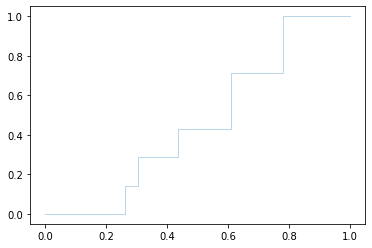

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 2
265
30
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_111 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_111 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_111 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_112 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_112 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

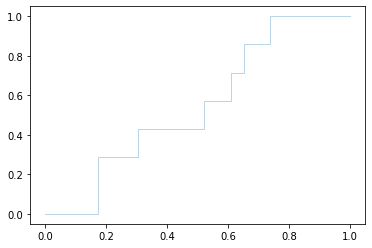

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 3
265
30
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_114 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_114 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_114 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_115 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_115 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

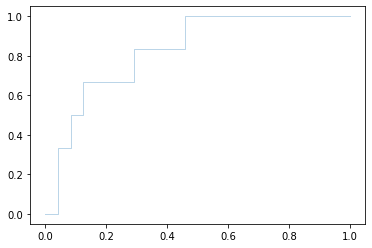

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 4
265
30
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_117 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_117 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_117 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_118 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_118 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

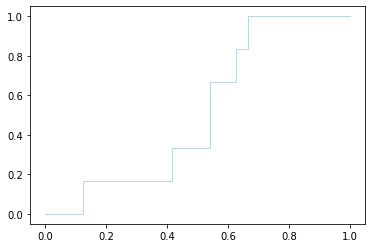

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 5
265
30
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_120 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_120 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_120 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_121 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_121 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

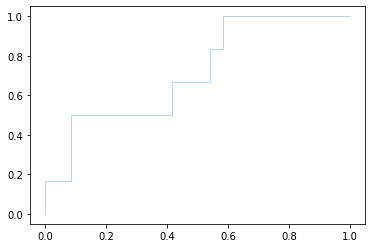

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 6
266
29
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_123 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_123 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_123 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_124 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_124 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

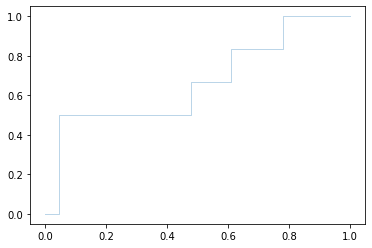

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 7
266
29
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_126 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_126 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_126 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_127 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_127 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

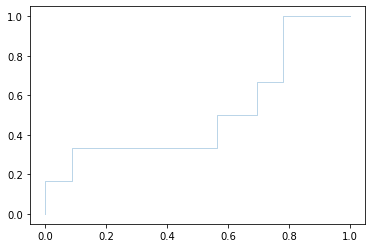

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 8
266
29
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_129 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_129 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_129 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_130 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_130 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

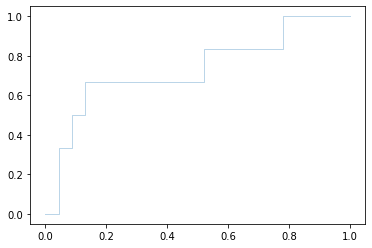

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 9
266
29
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_46 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_132 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_132 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_132 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_133 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_133 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

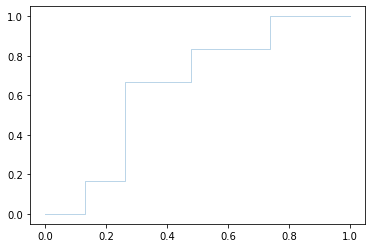

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 10
266
29
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_135 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_135 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_135 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_136 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_136 (MaxPoolin (None, 14, 14, 14, 20)    0         
______________________________________________________

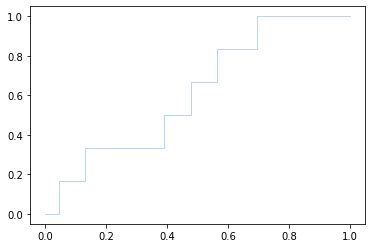

saved model to disk


In [247]:
roc_aucs=[]
tprs=[]
fprs=[]
skf_count = 0

with parallel_backend('threading', n_jobs=15):

    for train_idx, val_idx in skf.split(x,y):
        print("STARTING MODEL TRAINING FOR SKFOLD SPLIT : " + str(skf_count + 1))
        print(len(train_idx))
        print(len(val_idx))

        x_train = x[train_idx]
        y_train = y[train_idx]
        x_val = x[val_idx]
        y_val = y[val_idx]


        # Define data loaders.
        train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
        validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

        batch_size = 10
        # Augment the on the fly during training.
        train_dataset = (
            train_loader.shuffle(len(x_train))
            .map(train_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )
        # Only rescale.
        validation_dataset = (
            validation_loader.shuffle(len(x_val))
            .map(validation_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )

        # Build model.
        model = get_model(width=64, height=64, depth=64)
        model.summary()

        # Compile model.
        initial_learning_rate = 0.0001
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
        )
        METRICS = [
            keras.metrics.AUC(name='auc')]


        model.compile(
            loss="binary_crossentropy",
            optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
            metrics=METRICS
        )

        # Define callbacks.
        checkpoint_cb = keras.callbacks.ModelCheckpoint(results_dir + "/model_" + str(skf_count) + ".h5", save_best_only=True)

        # Train the model, doing validation at the end of each epoch
        epochs = 20
        history=model.fit(
            train_dataset,
            validation_data=validation_dataset,
            epochs=epochs,
            shuffle=True,
            verbose=1,
            callbacks=[checkpoint_cb]
        )

        # Generate cross-validation metrics
        scores = model.evaluate(x_val, y_val, verbose=0)
        print(f'Score for fold {skf_count}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
        loss_per_fold.append(scores[0])
        
        # Predict y for x validation
        y_pred=model(x_val)
        fpr, tpr, thresh=roc_curve(y_val, y_pred)
                                   
        roc_auc=auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        
        roc_aucs.append(roc_auc)#store AUC per fold
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC=%0.2f)'%(skf_count+1, roc_auc)) 
        plt.show()
        
        model_json=model.to_json()
        with open(results_dir + "/model_" + str(skf_count)+".json", "w") as json_file:
            json_file.write(model_json)

        model.save_weights(results_dir + "/model_" + str(skf_count) + ".h5")
        print("saved model to disk")        
        skf_count = skf_count + 1 #increase fold number

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


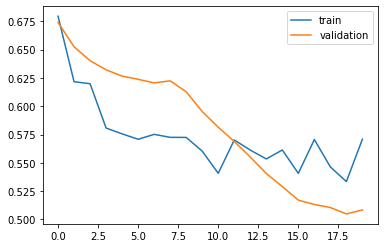

In [133]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])

0.6235679779158041


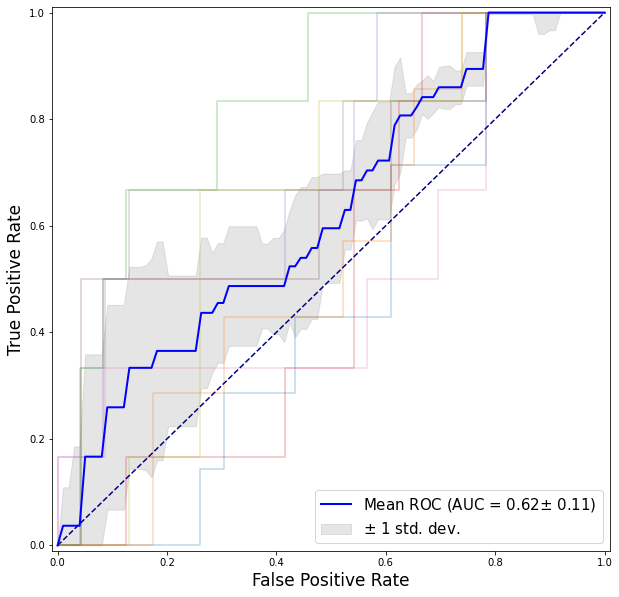

In [249]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
tpr=[]
mean_fpr = np.linspace(0,1,100)

for i in range(0,9):
    tpr.append(np.interp(mean_fpr, fprs[i], tprs[i]))
    tpr[-1][0]=0
    
mean_tpr=np.mean(tpr,axis=0)
mean_tpr[-1]=1

stdtpr=np.std(tprall, axis=0)
tprs_upper=np.minimum(mean_tpr+stdtpr,1)
tprs_lower=np.maximum(mean_tpr-stdtpr,0)

mean_auc=auc(mean_fpr, mean_tpr)
std_auc=np.std(roc_aucs)
#mean_fprs=np.mean(fprs)
#mean_tprs=np.mean(tprs)
plt.figure(figsize=(10,10))
for i in range(0,9):
    plt.plot(fprs[i], tprs[i], alpha=0.3)
    
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label=r'Mean ROC (AUC = %0.2f$\pm$ %0.2f)'%(mean_auc, std_auc))
plt.fill_between(mean_fpr, tprs_lower, tprs_upper,  color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.title
plt.legend(loc="lower right", prop={'size':15})

print(np.mean(roc_aucs))

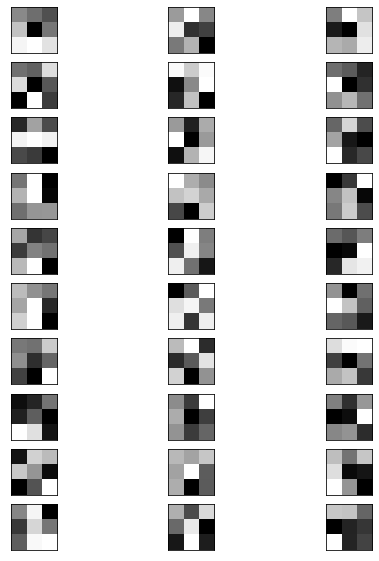

In [181]:
from matplotlib import pyplot
filters, biases=model.layers[1].get_weights() #get first conv layer
f_min,f_max=filters.min(), filters.max()
filters=(filters-f_min)/(f_max-f_min)#normalize to 0-1 for visualization


n_filters, ix=10, 1

#plot filters
fig=plt.figure(figsize=(8,10))
for i in range(n_filters):
    f=filters[:,:,:,0,i]
    for j in range(3):
        ax=pyplot.subplot(10,3,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:,:,j], cmap="gray")
        ix+=1
    

1 conv3d_105 (None, 62, 62, 62, 10)
4 conv3d_106 (None, 29, 29, 29, 20)
7 conv3d_107 (None, 12, 12, 12, 40)
(1, 64, 64, 64, 1)
(1, 62, 62, 62, 10)
shape
(62, 62)


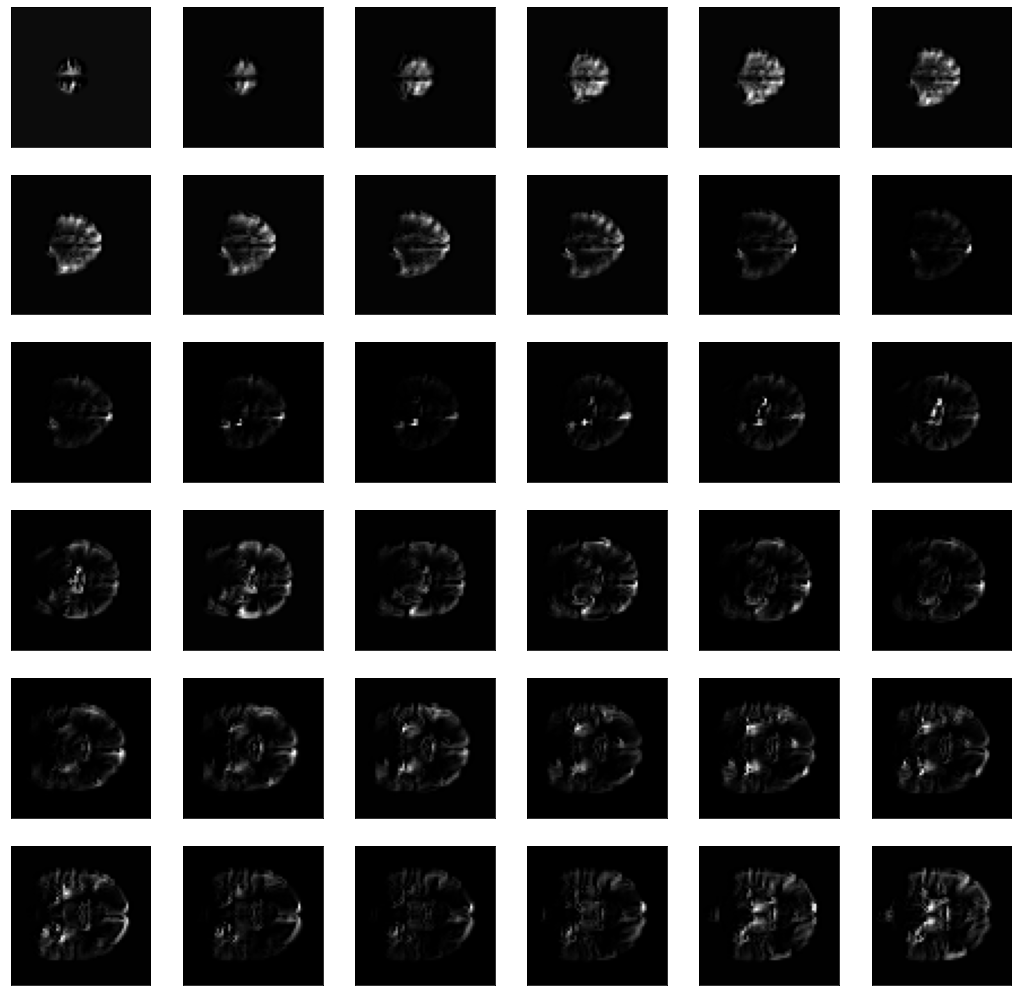

In [246]:
from keras.models import Model
from numpy import expand_dims
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)
    

# redefine model to output right after the first hidden layer
model2 = Model(inputs=model.inputs, outputs=model.layers[1].output)
model2.layers
print(img.shape)
img,label = train_preprocessing(x_train[0],1)
img=expand_dims(img,axis=0)
feature_maps = model2.predict(img)

print(feature_maps.shape)

fig=plt.figure(figsize=(18,18))
print('shape')
ttt=feature_maps[0, :, : ,1,1]

print(ttt.shape)

# plot all 64 maps in an 8x8 squares
square = 6
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, ix-1, :, :,2], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [85]:
skf_count


10

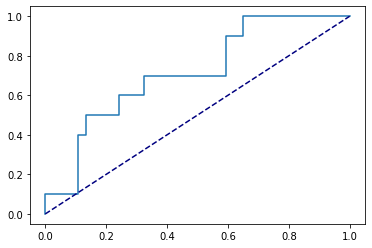

In [71]:

y_pred=model(x_val)
fpr, tpr, thresh=roc_curve(y_val, y_pred)
print(auc(fpr, tpr))
plt.plot(fpr, tpr)
